## Day 1: Basic image Manipulation

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve
import os

%matplotlib inline

In [14]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [15]:
"""URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)
"""

'URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"\n\nasset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB4.zip")\n\n# Download if assest ZIP does not exists.\nif not os.path.exists(asset_zip_path):\n    download_and_unzip(URL, asset_zip_path)\n'

### 1. image resizing

In [16]:
img = cv.imread("C:\\Users\\meta\\Deep_Tech\\Open_cv_bootcamp\\opencv_image\\New_Zealand_Coast.jpg")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)


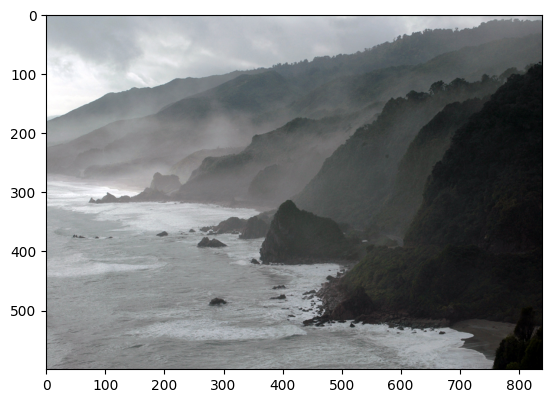

In [17]:
# convert image data to array

img = np.array(img)
plt.imshow(img)

plt.show()

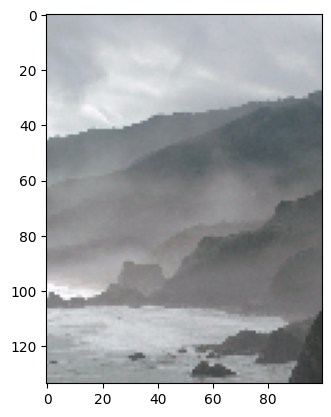

In [18]:
# manually cropping using pixel manipulation

cropped_img = img[0:400:3,100:400:3]
plt.imshow(cropped_img)

### 2. Resize image

In [19]:
dsize= (2000,3000)
resized_img = cv.resize(cropped_img,dsize)

### 3. Flipping image

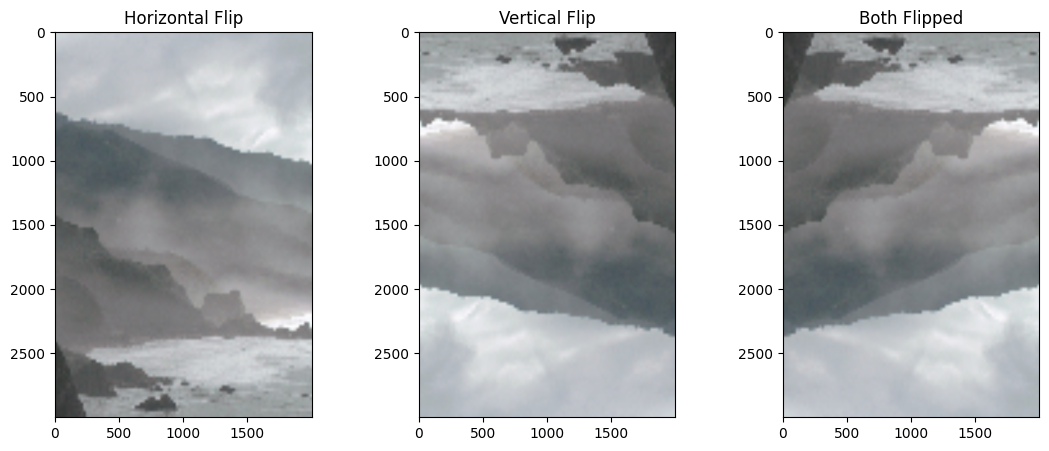

In [20]:
# flipping image using flip method

horz_flipped_img = cv.flip(resized_img,1) # flip the image horizontal direction
vert_flipped_img = cv.flip(resized_img,0) # flip the image in vertical direction
both_flipped_img = cv.flip(resized_img,-1) # flip the image in both direction

#show the images
plt.figure(figsize=(18,5))
plt.subplot(141);plt.imshow(horz_flipped_img);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(vert_flipped_img);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(both_flipped_img);plt.title("Both Flipped");

plt.show()

##  Day 2. Image Annotation

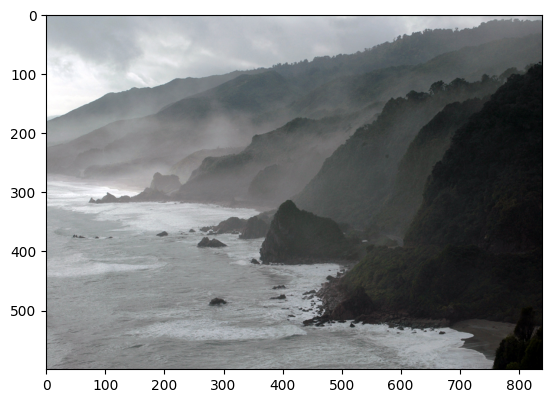

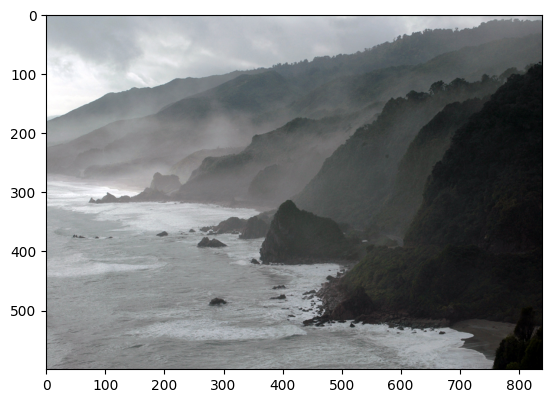

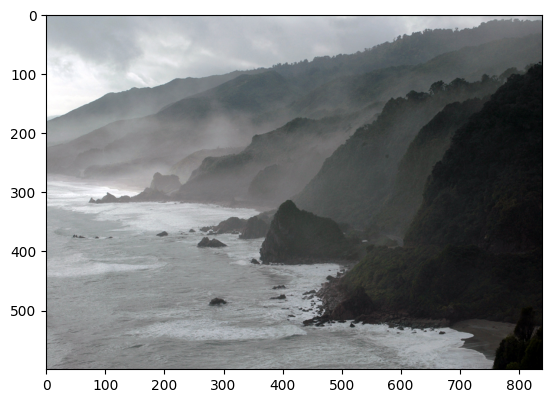

array([[[174, 183, 188],
        [176, 183, 189],
        [174, 181, 189],
        ...,
        [163, 170, 176],
        [164, 171, 177],
        [167, 172, 176]],

       [[176, 183, 189],
        [176, 183, 189],
        [175, 182, 190],
        ...,
        [166, 171, 177],
        [167, 172, 178],
        [164, 169, 173]],

       [[173, 180, 186],
        [173, 180, 188],
        [172, 181, 188],
        ...,
        [166, 171, 175],
        [166, 171, 175],
        [165, 170, 174]],

       ...,

       [[153, 157, 156],
        [151, 155, 154],
        [150, 150, 152],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[149, 153, 154],
        [149, 153, 154],
        [152, 152, 154],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[150, 154, 155],
        [152, 153, 155],
        [152, 153, 155],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [21]:
# Funtion that draw shape on an image
"""
to draw a shape we used different method form cv. the following are the crucial method for each shappe
-------> cv. 
                rect : Draw Rectangle with the adjacent cordinate point given  as a tuple parameter 
                line : Draw a line with start and stop cordiante given as a parameter
                circle : circle with radius and center passed  param
"""

def draw_shape(img,shape,point1_center=None,point2_radius=None,colour=(0,0,255),thickness=10,lineType=cv.LINE_AA):
    image = img.copy() # copy the original image
    if shape == "line":
        cv.line(image,point1_center,point2_radius,colour,thickness,lineType)
    elif shape == "circle":
        cv.circle(image,point1_center,point2_radius,colour,thickness,lineType)
    elif shape == "rectangle":
        cv.rectangle(image,point1_center,point2_radius,colour,thickness,lineType)
    else:
        print("error")

    plt.imshow(image)
    plt.show()
    return(image) # return the image 
        



draw_shape(img,"line",(1000,2000),(5000,2000),8)
draw_shape(img,"circle",(3200,2500),800,8) 
draw_shape(img,"rectangle",(1000,2000),(5000,5000),8) 


## Day 3: Image Ehancement

### Contrast and brightness

In [22]:
 """
 change in contrast and brightness takes advantage of the pixelwise of image to ehance the image through Multiplication and Brughtness respectively
 """

def enhance_image(img, enhancement_type="Brightness", scale_factor=1, direction="up"):

    """
    change in contrast and brightness takes advantage of the pixelwise of image to ehance the image through Multiplication and Brughtness respectively
    image's contrast and brightness can either be increase or decrease when  up or down is passed to the direction factor parameter
     """
    
    
    image = img.copy() # retain the original image
    image = np.array(image, dtype=np.uint8)

    if enhancement_type == "Brightness":  # 
        factor_matrix = np.full(image.shape, scale_factor, dtype=np.uint8)

        if direction == "up":
            image = cv.add(image, factor_matrix)
        elif direction == "down":
            image = cv.subtract(image, factor_matrix)

    elif enhancement_type == "contrast":
        if direction == "up":
            image = cv.convertScaleAbs(image, alpha=scale_factor, beta=0)
        elif direction == "down":
            image = cv.convertScaleAbs(image, alpha=1.0/scale_factor, beta=0)

    # Convert BGR to RGB if needed for matplotlib
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.title(f"{enhancement_type} {direction}")
    plt.show()

    return image


### Image Thresholding

In [24]:

img = cv.imread("building-windows.jpg")

TypeError: Image data of dtype object cannot be converted to float

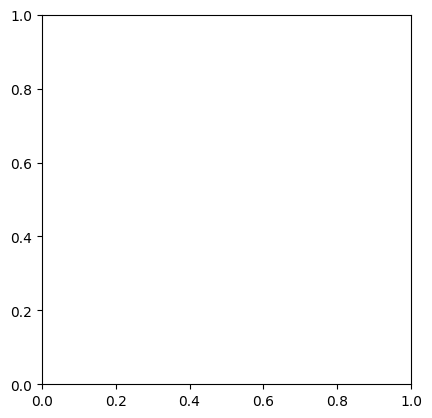

In [25]:
plt.imshow(img)
plt.show()

In [ ]:
img_read = cv.imread("building-windows.jpg", cv.IMREAD_GRAYSCALE)
retval, img_thresh = cv.threshold(img_read, 100, 255, cv.THRESH_BINARY)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(121);plt.imshow(img_read, cmap="gray");  plt.title("Original")
plt.subplot(122);plt.imshow(img_thresh, cmap="gray");plt.title("Thresholded")

print(img_thresh.shape)

In [ ]:
img = cv.imread(f"{img_path}Piano_Sheet_Music.png", cv.IMREAD_GRAYSCALE)



In [ ]:
# Gloal Thresholding
retval,img_thresh1 = cv.threshold(img,50,255,cv.THRESH_BINARY)
retval,img_thresh2 = cv.threshold(img,150,255,cv.THRESH_BINARY)

# Adaptive Thresholding
img_thresh3 = cv.adaptiveThreshold(img,255, cv.ADAPTIVE_THRESH_MEAN_C,cv.THRESH_BINARY,11,5)

img_list = [img_thresh1,img_thresh2,img_thresh3]
img_title = ["global thresholding1","global thresholding2","Adaptive thresholding"]
plt.figure(figsize=(10,8))
for idx,im in enumerate(img_list):
    plt.subplot(1,3,idx+1);plt.title(img_title[idx])
    plt.imshow(im,cmap="gray")

plt.show()


In [ ]:
# Change Background

img_bgra = cv.imread(f"{img_path}coca-cola-logo.png")

fg_img = cv.cvtColor(img_bgra, cv.COLOR_BGR2RGB)


fg_logo_w = fg_img.shape[0]
fg_logo_h = fg_img.shape[1]


img_bgr = cv.imread(f"{img_path}checkerboard_color.png")
bg_img = cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)


bg_logo_w = bg_img.shape[0]
bg_logo_h = img_rgb.shape[1]

#Set desired width (logo_w) and maintain image aspect ratio
aspect_ratio = fg_logo_w / bg_logo_w
dim = (fg_logo_w, int(bg_img.shape[0] * aspect_ratio))

bg_img = cv.resize(bg_img, dim, interpolation=cv.INTER_AREA)

plt.imshow(bg_img)

In [ ]:
# Create image mask
fg_img_gray = cv.cvtColor(fg_img,cv.COLOR_RGB2GRAY)
retv,image_mask = cv.threshold(fg_img_gray,127,255,cv.THRESH_BINARY)
image_mask_inv = cv.bitwise_not(image_mask)
plt.imshow(image_mask_inv,cmap="gray")

In [ ]:
img_background = cv.bitwise_and(bg_img,bg_img,mask=image_mask)
plt.imshow(img_background)

In [ ]:
isolated_fg = cv.bitwise_and(fg_img,fg_img,mask=image_mask_inv)
plt.imshow(isolated_fg)

In [ ]:
result = cv.add(isolated_fg,img_background)
plt.imshow(result)

## Day 5

In [ ]:
import sys
s=0

if len(sys.argv)>1:
    s = sys.argv[1]  # Use default camera

video = cv.VideoCapture(s)

win_name = 'Camera Preview'
cv.namedWindow(win_name, cv.WINDOW_NORMAL)

while cv.waitkey(1) != 27:
    retval, frame = video.read()
    if not retval:
        break
    cv.imshow(win_name,frame)
video.release()
cv.destroyWindow(win_name)


In [ ]:
import cv2 as cv
import sys

s = 0  # default: use webcam 0

# If a command-line argument is passed, use it as source
if len(sys.argv) > 1:
    s = sys.argv[1]
    try:
        s = int(s)  # cast to int if webcam index (e.g., 0 or 1)
    except ValueError:
        pass  # keep as string if it's a filename or URL

video = cv.VideoCapture(s)

win_name = 'Camera Preview'
cv.namedWindow(win_name, cv.WINDOW_NORMAL)

while cv.waitKey(1) != 27:  # Exit on Esc key
    retval, frame = video.read()
    if not retval:
        break
    cv.imshow(win_name, frame)

video.release()
cv.destroyWindow(win_name)


## Day 5 

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

In [ ]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [ ]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

In [ ]:
source = "race_car.mp4" # source =  for webcam


In [ ]:
!python opencv_day_5.py

## Day 6

In [ ]:
# Download Asset

In [18]:
!python opencv_day_6.py

[ WARN:0@7.173] global cap.cpp:781 cv::VideoWriter::open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\videoio\src\cap_images.cpp:415: error: (-215:Assertion failed) !filename_pattern.empty() in function 'cv::CvVideoWriter_Images::CvVideoWriter_Images'




## Day 7

### Image Feature and Aligmnent 

In [ ]:
### Asset Download 
from zipfile import ZipFile
from urllib.request import urlretrieve

%matplotlib inline


def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)



In [ ]:

asset_path = "C:\\Users\\meta\\Deep_Tech\\Open_cv_bootcamp\\Asset"


In [ ]:
URL = r"https://www.dropbox.com/s/zuwnn6rqe0f4zgh/opencv_bootcamp_assets_NB8.zip?dl=1"

asset_zip_path = os.path.join(asset_path, f"opencv_bootcamp_assets_NB8.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)  

In [16]:

import cv2 as cv
import numpy as np 
import matplotlib.pyplot  as plt

image_path = "opencv_image"
# Read reference image
image_path = "opencv_image"
refFilename = os.path.join(image_path, "form.jpg")
imFilename = os.path.join(image_path, "scanned-form.jpg")

im1 = cv.imread(refFilename, cv.IMREAD_COLOR)
im1 = cv.cvtColor(im1, cv.COLOR_BGR2RGB)

# Read image to be aligned
print("Reading image to align:", imFilename)
im2 = cv.imread(imFilename, cv.IMREAD_COLOR)
im2 = cv.cvtColor(im2, cv.COLOR_BGR2RGB)

Reading image to align: opencv_image\scanned-form.jpg


### Note

1. Image alligment uses [ORB](https://github.com/ImranNawar/orb_feature_descriptor) for feature detection and feature extraction. 
 `ORB` is a feature detection and escription algorithm. it mean Oriented Fast and Rotated Brief.
2. `Feature Descriptors` are aldgorithm that extract `uniques` characteristics or pattern for  images
3. ORB is a fusion of FAST keypoint detector and BRIEF descriptor with performance improvement
4. It is applied in :
    Image Matching,
   Object Recognition,
   Image Stitching,
   SLAM ( simultaneous Localization and Mapping)
   


- Popular Features Descriptors
  - SIFT (Scale-Invariant Feature Transform)
  - SURF (Speeded Up Robust Features)
  - FAST (Features from Accelerated Segment Test)
  - BRIEF (Binary Robust Independent Elementary Features)
  - ORB (Oriented FAST and Rotated BRIEF

- Keypoint Detctor Algorith focuse on these :
     - Corners
     - Blob
     - and not always Edge becaues they are not always unique